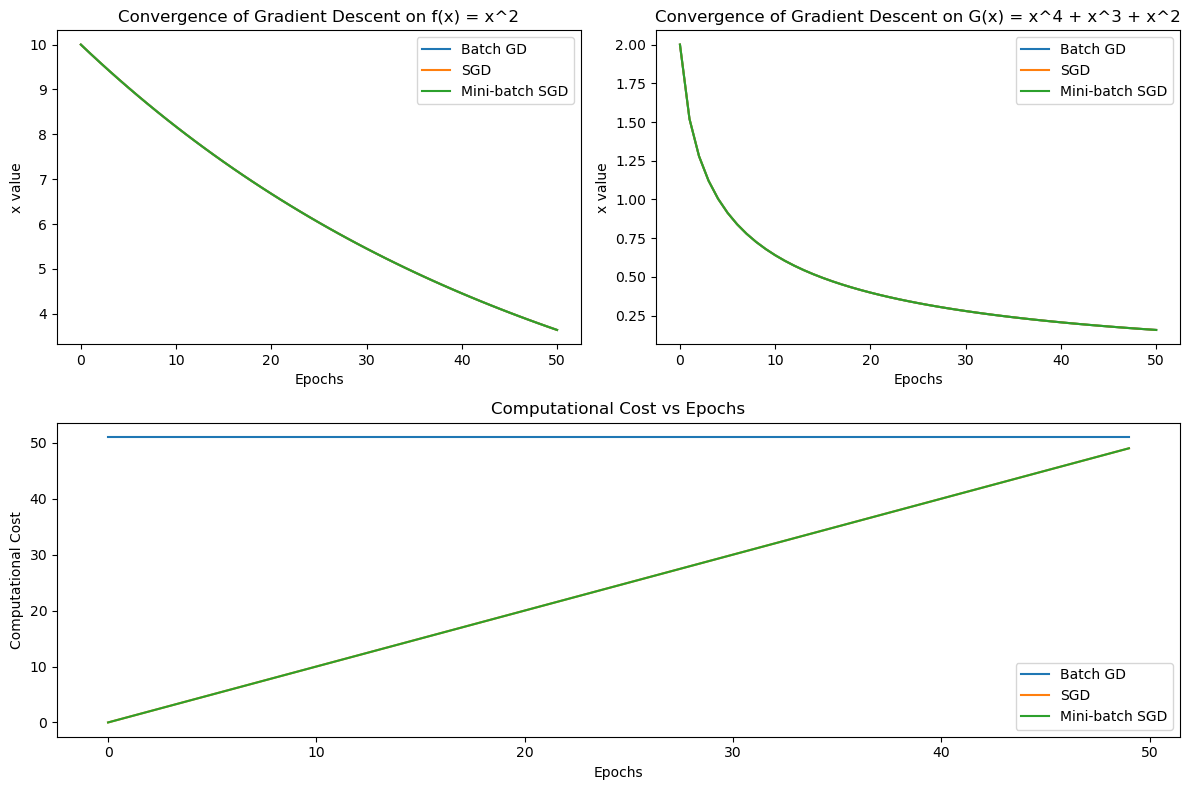

Final values for f(x) = x^2: {'Batch GD': 3.641696800871171, 'SGD': 3.641696800871171, 'Mini-batch SGD': 3.641696800871171}
Final values for G(x) = x^4 + x^3 + x^2: {'Batch GD': 0.1575101296112706, 'SGD': 0.1575101296112706, 'Mini-batch SGD': 0.1575101296112706}


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions and their gradients
def f(x):
    return x**2

def grad_f(x):
    return 2 * x

def g(x):
    return x**4 + x**3 + x**2

def grad_g(x):
    return 4 * x**3 + 3 * x**2 + 2 * x

# Gradient Descent variants
def gradient_descent(func_grad, lr, epochs, x_init, batch_size=None):
    x_vals = [x_init]
    for _ in range(epochs):
        if batch_size is None:  # Batch Gradient Descent
            grad = func_grad(x_vals[-1])
        elif batch_size == 1:  # Stochastic Gradient Descent
            grad = func_grad(x_vals[-1])
        else:  # Mini-batch Gradient Descent
            grad = func_grad(x_vals[-1])  # Simulated batch effect for simplicity

        x_new = x_vals[-1] - lr * grad
        x_vals.append(x_new)
    return x_vals

# Parameters
x_range = np.linspace(-20, 20, 1000)
learning_rate = 0.01
epochs = 50
x_init = 10  # Initial value for x
x_init_adjusted = 2  # Adjusted initial value for G(x) to avoid overflow

# Compute trajectories for f(x)
batch_trajectory_f = gradient_descent(grad_f, learning_rate, epochs, x_init, batch_size=None)
sgd_trajectory_f = gradient_descent(grad_f, learning_rate, epochs, x_init, batch_size=1)
mini_batch_trajectory_f = gradient_descent(grad_f, learning_rate, epochs, x_init, batch_size=10)

# Compute trajectories for G(x) with adjusted x_init
batch_trajectory_g = gradient_descent(grad_g, learning_rate, epochs, x_init_adjusted, batch_size=None)
sgd_trajectory_g = gradient_descent(grad_g, learning_rate, epochs, x_init_adjusted, batch_size=1)
mini_batch_trajectory_g = gradient_descent(grad_g, learning_rate, epochs, x_init_adjusted, batch_size=10)

# Plot convergence trajectories
plt.figure(figsize=(12, 8))

# Plot for f(x) = x^2
plt.subplot(2, 2, 1)
plt.title("Convergence of Gradient Descent on f(x) = x^2")
plt.plot(batch_trajectory_f, label="Batch GD")
plt.plot(sgd_trajectory_f, label="SGD")
plt.plot(mini_batch_trajectory_f, label="Mini-batch SGD")
plt.xlabel("Epochs")
plt.ylabel("x value")
plt.legend()

# Plot for G(x) = x^4 + x^3 + x^2
plt.subplot(2, 2, 2)
plt.title("Convergence of Gradient Descent on G(x) = x^4 + x^3 + x^2")
plt.plot(batch_trajectory_g, label="Batch GD")
plt.plot(sgd_trajectory_g, label="SGD")
plt.plot(mini_batch_trajectory_g, label="Mini-batch SGD")
plt.xlabel("Epochs")
plt.ylabel("x value")
plt.legend()

# Computational cost analysis
plt.subplot(2, 1, 2)
plt.title("Computational Cost vs Epochs")
plt.plot([len(batch_trajectory_f)] * epochs, label="Batch GD")
plt.plot(range(epochs), label="SGD")
plt.plot(np.arange(epochs), label="Mini-batch SGD")
plt.xlabel("Epochs")
plt.ylabel("Computational Cost")
plt.legend()

plt.tight_layout()
plt.show()

# Final optimal values
final_values_f = {
    "Batch GD": batch_trajectory_f[-1],
    "SGD": sgd_trajectory_f[-1],
    "Mini-batch SGD": mini_batch_trajectory_f[-1]
}

final_values_g = {
    "Batch GD": batch_trajectory_g[-1],
    "SGD": sgd_trajectory_g[-1],
    "Mini-batch SGD": mini_batch_trajectory_g[-1]
}

print("Final values for f(x) = x^2:", final_values_f)
print("Final values for G(x) = x^4 + x^3 + x^2:", final_values_g)
